# Background

**Ethereum** is a blockchain platform with its own cryptocurrency, called **Ether (ETH)** or Ethereum, and its own programming language, called Solidity. 

As a blockchain network, Ethereum is a **decentralized** public ledger for verifying and recording transactions. The network's users can create, publish, monetize, and use applications on the platform, and use its Ether **cryptocurrency** as payment. Insiders call the decentralized applications on the network "dapps." As a cryptocurrency, Ethereum is second in market value only to Bitcoin, as of Oct 2021.

At this project, we try to scrap **Ethereum USD (Historical Data)** from **CoinGecko** website. CoinGecko is the world's largest independent cryptocurrency data aggregator with over 6,000 different cryptoassets tracked across more than 400 exchanges worldwide. We will try to scrap this sites for educational purpose only.

We will scrap 2 points from this sites. One is trading volume, which is the total amount of coins traded in the last 24 hours. The other one is dates in the period 1 January 2020 to 30 June 2021. After that we will try to get the trend of trading volume in the expected period to be analyzed and concluded.

## Library Preparation

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


## Requesting the Data and Creating a BeautifulSoup

Requesting the website with `request` get method to be able fetch the data.

In [2]:
url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly we get from the `request.get`, we can use .content to see what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="description" content="Get Ethereum (ETH) USD historical prices." />\n\n\n<script>(function(w,d,s,l,'

As we can see we get a very **unstructured** and **complex** html, which actually contains the codes needed to show the webpages on our web browser. But we as human still confused what and where we can use that piece of code, so here where we use the **beautifulsoup**. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a **complex tree** of Python objects.

In [4]:
soup = BeautifulSoup(url_get.content,"html.parser")
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="/OpensearchDescription.xml" rel="search" type="application/opensearchdescription+xml">
   <title>
    Ethereum USD Historical Data | CoinGecko
   </title>
   <meta content="Get Ethereum (ETH) USD historical prices." name="description">
  


## Finding the right key to scrap the data & Extracting the right information

Now we already have a tidier html, now we should search the lines that we want to use. Let's back to our web page first.

<img src="assets/geckoweb.png">

The information that we need are the date and the trading volume, which contain in the table. To know which part of the code refer to that table, we can just move our cusor there, right click, and inspect element. Then we will see something like this.

<img src="assets/inspect_el.png">

From inspect element, we know that we need to find the line table `tbody` that contains Ethereum historical data, including date and volume data.

We **don't** use class `table-striped text-sm text-lg-normal` because it contains it's header that's not necessary for this case. 

We can use the `find` method at our beautifusoup object to get the line table.

In [5]:
table = soup.find('tbody') #<tbody> contains table's value without header
print(table.prettify()[0:500])

<tbody>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2021-06-30
  </th>
  <td class="text-center">
   $253,607,549,372
  </td>
  <td class="text-center">
   $27,149,143,847
  </td>
  <td class="text-center">
   $2,169.40
  </td>
  <td class="text-center">
   N/A
  </td>
 </tr>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2021-06-29
  </th>
  <td class="text-center">
   $243,040,539,437
  </td>
  <td class="text-center">
   $30,629,329,806
  </td>
  <td class="te


As we can see from the line we just extract, we get all the content we needed. From the results above, we know that the classes of each data we need are as follows:
- date: `th, class="font-semibold text-center"`
- volume: `td, class="text-center"`

After that, we will use `find_all` method to finding out **all tags** with the specified tag name or id and returning them as a list of type bs4.

In [6]:
#get `date` elements
table.find_all('th', attrs={'class':'font-semibold text-center'})[:5]

[<th class="font-semibold text-center" scope="row">2021-06-30</th>,
 <th class="font-semibold text-center" scope="row">2021-06-29</th>,
 <th class="font-semibold text-center" scope="row">2021-06-28</th>,
 <th class="font-semibold text-center" scope="row">2021-06-27</th>,
 <th class="font-semibold text-center" scope="row">2021-06-26</th>]

In [7]:
#get `volume` elements
table.find_all('td', attrs={'class':'text-center'})[:5] 

[<td class="text-center">
 $253,607,549,372
 </td>,
 <td class="text-center">
 $27,149,143,847
 </td>,
 <td class="text-center">
 $2,169.40
 </td>,
 <td class="text-center">
 N/A
 </td>,
 <td class="text-center">
 $243,040,539,437
 </td>]

Finding row length:

In [8]:
#date row lenght
row = table.find_all('th', attrs={'class':'font-semibold text-center'})
row_length = len(row)
row_length

547

In [9]:
#volume lenght
row2 = table.find_all('td', attrs={'class':'text-center'})
row_length2 = len(row2)
row_length2

2188

>The results above seem odd because `data` and `volume` have different number of rows. 
\
\
This happens because `volume` has the same class as the other columns such as **Market Cap**, **Open**, and **Close**. So when we try to call that `class`, other data will also be called, causing the number of row increase.

To get a better understanding of class `text-center` data, we will convert it to `list` type

In [10]:
temp_vol = []

for i in range(0, 15):
    
    volume = table.find_all('td', attrs={'class':'text-center'})[i].text.strip()
    
    temp_vol.append(volume)

temp_vol

['$253,607,549,372',
 '$27,149,143,847',
 '$2,169.40',
 'N/A',
 '$243,040,539,437',
 '$30,629,329,806',
 '$2,087.52',
 '$2,169.40',
 '$229,354,016,311',
 '$24,316,408,028',
 '$1,973.93',
 '$2,087.52',
 '$209,989,265,221',
 '$24,249,510,321',
 '$1,817.05']

We found that the `volume` data lies in list number 1, 5, 9, 13, ... with a **4-digit gap**.

From the analysis above, the scrapping process is then carried out by creating a special variable `x` which starts from number 1 and enters the looping process by adding 4 values for each iteration.

In the case of `date`, we can use a normal loop to get the list.

In [11]:
temp = []
x = 1

for i in range(0, row_length):
    
    date = table.find_all('th', attrs={'class':'font-semibold text-center'})[i].text
    volume = table.find_all('td', attrs={'class':'text-center'})[x].text.strip()
    x = x+4
    
    temp.append((date,volume))

#temp

In [12]:
len(temp)

547

In [13]:
temp = temp[::-1] #change row order. Descending frow oldest to newest
temp

[('2020-01-01', '$7,103,187,151'),
 ('2020-01-02', '$6,623,732,041'),
 ('2020-01-03', '$6,497,297,884'),
 ('2020-01-04', '$9,655,245,100'),
 ('2020-01-05', '$6,958,393,690'),
 ('2020-01-06', '$7,260,645,128'),
 ('2020-01-07', '$9,514,201,882'),
 ('2020-01-08', '$9,440,938,788'),
 ('2020-01-09', '$10,095,847,759'),
 ('2020-01-10', '$7,280,640,218'),
 ('2020-01-11', '$10,273,370,788'),
 ('2020-01-12', '$9,737,605,323'),
 ('2020-01-13', '$8,488,793,478'),
 ('2020-01-14', '$8,019,794,567'),
 ('2020-01-15', '$18,970,204,899'),
 ('2020-01-16', '$17,862,385,532'),
 ('2020-01-17', '$14,605,493,159'),
 ('2020-01-18', '$15,915,322,020'),
 ('2020-01-19', '$15,808,136,411'),
 ('2020-01-20', '$14,003,433,869'),
 ('2020-01-21', '$10,983,216,126'),
 ('2020-01-22', '$8,267,420,453'),
 ('2020-01-23', '$8,809,189,829'),
 ('2020-01-24', '$9,017,537,604'),
 ('2020-01-25', '$11,043,498,595'),
 ('2020-01-26', '$8,673,816,085'),
 ('2020-01-27', '$10,518,901,915'),
 ('2020-01-28', '$12,435,457,693'),
 ('2020-

## Creating data frame & Data wrangling

Put the array into dataframe

In [14]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.float_format = '{:,}'.format

df = pd.DataFrame(temp, columns = ('Date','Volume'))
df.head()

,Date,Volume
0,2020-01-01,"$7,103,187,151"
1,2020-01-02,"$6,623,732,041"
2,2020-01-03,"$6,497,297,884"
3,2020-01-04,"$9,655,245,100"
4,2020-01-05,"$6,958,393,690"


In [15]:
df.dtypes

Date      object
Volume    object
dtype: object

We will change the `volume` datatype to float datatype because normally trading volume presented in decimal form. But before we can do that, we need to drop the comma and dollar symbol by using `str.replace()`. Then lastly, we fix our `date` datatype to datetime datatype.

In [16]:
df['Volume'] = df['Volume'].astype('str')
df['Volume'] = df['Volume'].str.replace("$","", regex=True)
df['Volume'] = df['Volume'].str.replace(",","")
df['Volume'] = df['Volume'].astype('float64')
df['Date'] = df['Date'].astype('datetime64')

df.dtypes

Date      datetime64[ns]
Volume           float64
dtype: object

In [17]:
df

,Date,Volume
0,2020-01-01,"7,103,187,151.0"
1,2020-01-02,"6,623,732,041.0"
2,2020-01-03,"6,497,297,884.0"
3,2020-01-04,"9,655,245,100.0"
4,2020-01-05,"6,958,393,690.0"
...,...,...
542,2021-06-26,"25,981,381,067.0"
543,2021-06-27,"24,249,510,321.0"
544,2021-06-28,"24,316,408,028.0"
545,2021-06-29,"30,629,329,806.0"


In [18]:
df = df.set_index('Date')
df

,Volume
Date,
2020-01-01,"7,103,187,151.0"
2020-01-02,"6,623,732,041.0"
2020-01-03,"6,497,297,884.0"
2020-01-04,"9,655,245,100.0"
2020-01-05,"6,958,393,690.0"
...,...
2021-06-26,"25,981,381,067.0"
2021-06-27,"24,249,510,321.0"
2021-06-28,"24,316,408,028.0"


## Data Visualization & Analysis

First, visualization of the `df` dataframe in the form of a line chart is carried out. Line charts are considered the most relevant because the data represents trading volume growth during a given period of time.

<AxesSubplot:title={'center':'Ethereum Volume Trend'}, xlabel='Date', ylabel='Volume (in 100B USD)'>

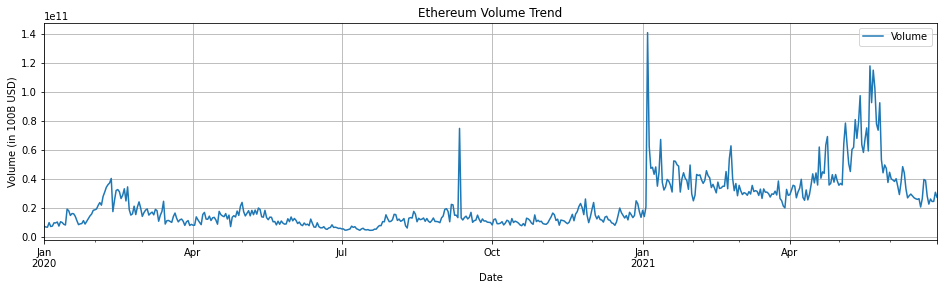

In [19]:
df.plot(figsize=(16, 4), grid=True, title='Ethereum Volume Trend', xlabel='Date', ylabel='Volume (in 100B USD)')

At first glance, it appears that the trading volume in 2021 is higher than in 2020. To explore each year's data, 2 variables are made consisting of trading volumes in 2020 and 2021 in semester 1.

In [20]:
sms20 = df.loc['2020-01-01':'2020-06-30',:]
sms21 = df.loc['2021-01-01':'2021-06-30',:]

In [21]:
sms20.describe()

,Volume
count,182.0
mean,"14,058,032,138.291208"
std,"6,905,880,573.027288"
min,"4,995,955,268.0"
25%,"9,019,142,064.25"
50%,"12,582,958,227.0"
75%,"17,088,130,884.0"
max,"40,180,881,297.0"


In [22]:
sms21.describe()

,Volume
count,181.0
mean,"41,560,126,171.475136"
std,"18,900,436,968.995304"
min,"13,843,183,079.0"
25%,"29,848,246,931.0"
50%,"36,105,354,379.0"
75%,"44,737,302,424.0"
max,"140,906,534,191.0"


Based on the `std` value of each variable, it is known that Ethereum has a high volatility.

In [23]:
sms20s = sms20['Volume'].sum()
sms21s = sms21['Volume'].sum()
growth = (sms21s - sms20s)/sms20s
percentage = "{:.0%}".format(growth)

print('Growth of total volume in semester 1 (2020 vs 2021):', percentage)

Growth of total volume in semester 1 (2020 vs 2021): 194%


The increase in volatility was followed by the growth of the total trading volume which increased to 2 times in 2021.

# Conclusion

1. Ethereum is highly volatile so one should be very cautious while investing, this instrument is considered more suitable for traders who are looking for large profits in a short period of time.
>Many of the reasons for price volatility in mainstream markets hold true for cryptocurrencies as well. News developments and speculation are responsible for fueling price swings in crypto and mainstream markets alike. But their effect is exaggerated in crypto markets as they have less liquidity than traditional financial markets — a result of crypto markets lacking a robust ecosystem of institutional investors and large trading firms. Heightened volatility and a lack of liquidity can create a dangerous combination because both feed off of each other. Other than bitcoin, most other cryptocurrencies also lack established and widely adopted derivatives markets. Under the sway of day traders and speculators, crypto prices sometimes exhibit healthy volatility of the type we see in mainstream markets.
\
\
source: https://www.gemini.com/cryptopedia/volatility-index-crypto-market-price

2. Even though it has high volatility, long-term investment through Etherium is still possible according to total YoY trading volume growth which still increasing up to 2 times. 
>Ethereum’s growth is attributed to an increasing number of developers building decentralized finance (DeFi) applications on the Ethereum blockchain platform. The rise of non-fungible tokens (NFT) also increases demand for Ethereum. Lastly, continued institutional interest in treating crypto like any other security also helps ETH. Coinbase is the new NYSE. ETH is No. 2 on Coinbase after Bitcoin. Seeing how the DeFi and NFT movements are directly connected to Ethereum, their increased activity has been the main driver for ETH prices in 2021, says Andrew Moss, GSR Capital’s managing director. “Users need ETH to interact with these technologies, so the more people who are involved with these communities and protocols, the higher the value of ETH goes,” he says.
\
\
source: https://www.forbes.com/sites/kenrapoza/2021/05/16/ethereum-faces-weekend-rout-but-some-see-eth-doubling-from-here/?sh=6845bee93817

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.